# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file= "output_data/cities.csv"
    
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
# set up additional columns to hold information
lats=[]
lngs=[]
city_names=[]
cloudiness=[]
countries=[]
dates=[]
humidity=[]
max_temp=[]
speed=[]

record_no=0
set_no =0
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#building query url
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "Los Angeles").json()
response
for city in cities:
    print(f"Processing Record {record_no} of Set {set_no} | {city}")
    record_no+=1
    if record_no%50==0:
        set_no +=1
        record_no =0
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response['name'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])
    except KeyError:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Processing Record 0 of Set 0 | karratha
Processing Record 1 of Set 0 | halden
Processing Record 2 of Set 0 | jamestown
Processing Record 3 of Set 0 | ilhabela
Processing Record 4 of Set 0 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 0 | castro
Processing Record 6 of Set 0 | urfa
City not found. Skipping...
Processing Record 7 of Set 0 | punta arenas
Processing Record 8 of Set 0 | wewak
Processing Record 9 of Set 0 | port augusta
Processing Record 10 of Set 0 | rodino
Processing Record 11 of Set 0 | dingle
Processing Record 12 of Set 0 | ushuaia
Processing Record 13 of Set 0 | celestun
Processing Record 14 of Set 0 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 0 | rafaela
Processing Record 16 of Set 0 | saskylakh
Processing Record 17 of Set 0 | naugarzan
City not found. Skipping...
Processing Record 18 of Set 0 | riobamba
Processing Record 19 of Set 0 | kavaratti
Processing Record 20 of Set 0 | wasilla
Processing Record 21 of Set 0 | nuevo c

Processing Record 37 of Set 3 | butia
Processing Record 38 of Set 3 | sibolga
Processing Record 39 of Set 3 | mehran
Processing Record 40 of Set 3 | husavik
Processing Record 41 of Set 3 | pointe-noire
Processing Record 42 of Set 3 | bengkulu
City not found. Skipping...
Processing Record 43 of Set 3 | kashi
City not found. Skipping...
Processing Record 44 of Set 3 | marawi
Processing Record 45 of Set 3 | maceio
Processing Record 46 of Set 3 | ivangorod
Processing Record 47 of Set 3 | mahebourg
Processing Record 48 of Set 3 | svetlogorsk
Processing Record 49 of Set 3 | sola
Processing Record 0 of Set 4 | karaton
Processing Record 1 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 4 | opunake
Processing Record 3 of Set 4 | abha
Processing Record 4 of Set 4 | esperance
Processing Record 5 of Set 4 | ikalamavony
Processing Record 6 of Set 4 | new norfolk
Processing Record 7 of Set 4 | nabire
Processing Record 8 of Set 4 | vardo
Processing Record 9 of

Processing Record 22 of Set 7 | harper
Processing Record 23 of Set 7 | barahona
Processing Record 24 of Set 7 | puerto narino
Processing Record 25 of Set 7 | preobrazheniye
Processing Record 26 of Set 7 | murwillumbah
Processing Record 27 of Set 7 | lata
Processing Record 28 of Set 7 | san jose
Processing Record 29 of Set 7 | stornoway
City not found. Skipping...
Processing Record 30 of Set 7 | syamzha
Processing Record 31 of Set 7 | moussoro
Processing Record 32 of Set 7 | urumqi
City not found. Skipping...
Processing Record 33 of Set 7 | leh
Processing Record 34 of Set 7 | whitehorse
Processing Record 35 of Set 7 | sabang
Processing Record 36 of Set 7 | upington
Processing Record 37 of Set 7 | hashtrud
Processing Record 38 of Set 7 | ouesso
Processing Record 39 of Set 7 | port-gentil
Processing Record 40 of Set 7 | marcona
City not found. Skipping...
Processing Record 41 of Set 7 | lebu
Processing Record 42 of Set 7 | sinnamary
Processing Record 43 of Set 7 | fereydun kenar
Processin

Processing Record 13 of Set 11 | ginda
Processing Record 14 of Set 11 | alekseyevka
Processing Record 15 of Set 11 | kerzhenets
City not found. Skipping...
Processing Record 16 of Set 11 | ampanihy
Processing Record 17 of Set 11 | arklow
Processing Record 18 of Set 11 | klaksvik
Processing Record 19 of Set 11 | loiza
Processing Record 20 of Set 11 | teeli
Processing Record 21 of Set 11 | wajima
Processing Record 22 of Set 11 | gulshat
City not found. Skipping...
Processing Record 23 of Set 11 | los llanos de aridane
Processing Record 24 of Set 11 | lufilufi
Processing Record 25 of Set 11 | serebryanyy bor
Processing Record 26 of Set 11 | cabo san lucas
Processing Record 27 of Set 11 | saldanha
Processing Record 28 of Set 11 | najran
Processing Record 29 of Set 11 | san benedetto del tronto
Processing Record 30 of Set 11 | mezotur
Processing Record 31 of Set 11 | glubczyce
Processing Record 32 of Set 11 | carutapera
Processing Record 33 of Set 11 | bangkalan
Processing Record 34 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
#creating dictionary and dataFrame
weather_dict = {
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temp,
    "Wind Speed": speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, sep=',', encoding="utf-8")
weather_data.count()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

In [52]:
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Karratha,0,AU,1547964988,25,-20.74,116.85,40.89,4.26
1,Halden,88,SE,1547963400,92,59.12,11.39,-5.00,2.10
2,Jamestown,0,AU,1547964927,82,-33.21,138.60,25.19,2.41
3,Ilhabela,0,BR,1547965023,97,-23.78,-45.36,27.54,3.46
4,Castro,0,CL,1547960400,100,-42.48,-73.76,11.00,1.50
5,Punta Arenas,20,CL,1547964000,61,-53.16,-70.91,8.00,6.20
6,Wewak,92,PG,1547965023,95,-3.55,143.63,26.04,0.86
7,Port Augusta,0,AU,1547964000,40,-32.49,137.76,30.00,7.70
8,Rodino,56,RU,1547965246,93,52.50,80.20,-3.01,5.61
9,Dingle,92,PH,1547965004,98,11.00,122.67,23.99,5.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/CityLatitudeVsMaxTemperature.png'

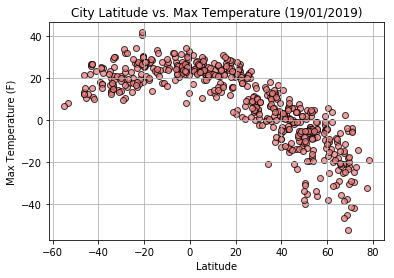

In [53]:
plt.scatter(lats, max_temp, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/CityLatitudeVsMaxTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/CityLatitudeVsHumidity.png'

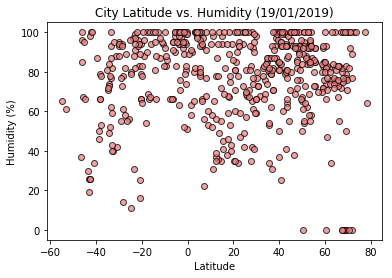

In [54]:
plt.scatter(lats, humidity, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/CityLatitudeVsHumidity.png")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/CityLatitudeVsCloudiness.png'

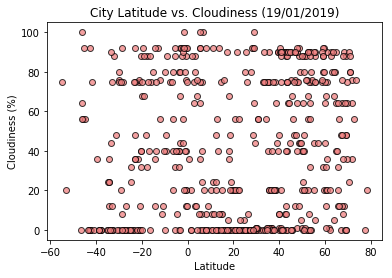

In [55]:

plt.scatter(lats, cloudiness, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/CityLatitudeVsCloudiness.png")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/CityLatitudeVsWindSpeed.png'

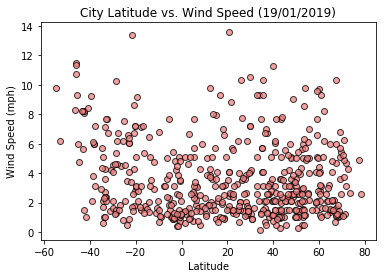

In [56]:

plt.scatter(lats, speed, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/CityLatitudeVsWindSpeed.png")
plt.grid(True)
plt.show()